In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

import scipy as sc


In [2]:
G = nx.karate_club_graph()

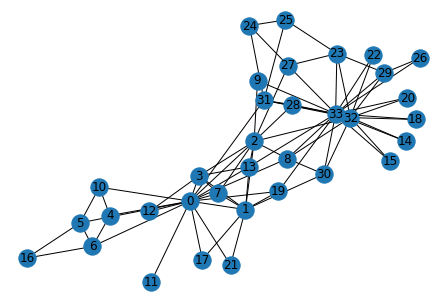

In [3]:
nx.draw(G, with_labels=True)

In [4]:
G.degree(0)

16

In [5]:
A = nx.adjacency_matrix(G)
A = A.toarray()
A

array([[0, 1, 1, ..., 1, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 1, 0]], dtype=int64)

In [6]:
# triangle counting
# power of adjaceny matrix
A3 = np.linalg.matrix_power(A, 3)
# networkx API
triangleCount = nx.triangles(G)

A3.diagonal()/2, np.array(list(triangleCount.values()))

(array([18., 12., 11., 10.,  2.,  3.,  3.,  6.,  5.,  0.,  2.,  0.,  1.,
         6.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  4.,  1.,  1.,
         1.,  1.,  1.,  4.,  3.,  3., 13., 15.]),
 array([18, 12, 11, 10,  2,  3,  3,  6,  5,  0,  2,  0,  1,  6,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  4,  1,  1,  1,  1,  1,  4,  3,  3, 13, 15]))

In [7]:
"""
triangle closing
"""

k = 4

# eigenvalue decomposition. Don't use SVD, it doesn't return similar U and U.T
V, U = np.linalg.eig(A)

# transform
Ak_pred = U @ np.diag(V ** k) @ U.T

# number of paths 2nd neighbors
Ak = np.linalg.matrix_power(A, k)

Ak, Ak_pred, np.round(Ak - Ak_pred).sum()

(array([[435, 271, 248, ...,  74, 179, 231],
        [271, 218, 189, ...,  72, 129, 164],
        [248, 189, 266, ..., 124, 147, 240],
        ...,
        [ 74,  72, 124, ..., 124, 100, 121],
        [179, 129, 147, ..., 100, 323, 358],
        [231, 164, 240, ..., 121, 358, 497]], dtype=int64),
 array([[435.+0.j, 271.+0.j, 248.+0.j, ...,  74.+0.j, 179.+0.j, 231.+0.j],
        [271.+0.j, 218.+0.j, 189.+0.j, ...,  72.+0.j, 129.+0.j, 164.+0.j],
        [248.+0.j, 189.+0.j, 266.+0.j, ..., 124.+0.j, 147.+0.j, 240.+0.j],
        ...,
        [ 74.+0.j,  72.+0.j, 124.+0.j, ..., 124.+0.j, 100.+0.j, 121.+0.j],
        [179.+0.j, 129.+0.j, 147.+0.j, ..., 100.+0.j, 323.+0.j, 358.+0.j],
        [231.+0.j, 164.+0.j, 240.+0.j, ..., 121.+0.j, 358.+0.j, 497.+0.j]]),
 0j)

In [8]:
"""
matrix exponential
"""

alpha = 0.2

# eigenvalue decomposition 
V, U = np.linalg.eig(A)

# transform
def transform(V, alpha=1):
    return np.array([np.exp(alpha*lamb) for lamb in V])

expA_pred = U @ np.diag(transform(V, alpha)) @ U.T

# actual
expA = sc.linalg.expm(A * alpha)

expA, expA_pred, np.round(expA - expA_pred).sum()

(array([[1.40365992, 0.41262282, 0.37835556, ..., 0.24417534, 0.09151016,
         0.11835604],
        [0.41262282, 1.23041531, 0.34232719, ..., 0.04435596, 0.06609438,
         0.0917042 ],
        [0.37835556, 0.34232719, 1.25162939, ..., 0.08820939, 0.27683641,
         0.1701503 ],
        ...,
        [0.24417534, 0.04435596, 0.08820939, ..., 1.13776869, 0.27146604,
         0.30028405],
        [0.09151016, 0.06609438, 0.27683641, ..., 0.27146604, 1.30112394,
         0.48324358],
        [0.11835604, 0.0917042 , 0.1701503 , ..., 0.30028405, 0.48324358,
         1.41971789]]),
 array([[1.40365992+0.j, 0.41262282+0.j, 0.37835556+0.j, ...,
         0.24417534+0.j, 0.09151016+0.j, 0.11835604+0.j],
        [0.41262282+0.j, 1.23041531+0.j, 0.34232719+0.j, ...,
         0.04435596+0.j, 0.06609438+0.j, 0.0917042 +0.j],
        [0.37835556+0.j, 0.34232719+0.j, 1.25162939+0.j, ...,
         0.08820939+0.j, 0.27683641+0.j, 0.1701503 +0.j],
        ...,
        [0.24417534+0.j, 0.04435596+

In [9]:
"""
neumann kernel
"""

alpha = 0.01

# neumann inverse
I = np.eye(A.shape[0])
neu = np.linalg.inv(I - A * alpha)

# eigenvalue decomposition 
V, U = np.linalg.eig(A)

# transform
def transform(V, alpha):
    return np.array([1 / (1-(alpha*lamb)) for lamb in V])

neu_pred = U @ np.diag(transform(V, alpha)) @ U.T

neu, neu_pred, np.round(neu - neu_pred).sum()

(array([[1.00164056e+00, 1.07398743e-02, 1.05446649e-02, ...,
         1.00278458e-02, 3.13897356e-04, 4.16437559e-04],
        [1.07398743e-02, 1.00092630e+00, 1.04360297e-02, ...,
         1.13790909e-04, 2.12376151e-04, 3.14744412e-04],
        [1.05446649e-02, 1.04360297e-02, 1.00102480e+00, ...,
         3.14321278e-04, 1.01336089e-02, 6.24548745e-04],
        ...,
        [1.00278458e-02, 1.13790909e-04, 3.14321278e-04, ...,
         1.00060728e+00, 1.01321135e-02, 1.02373486e-02],
        [3.13897356e-04, 2.12376151e-04, 1.01336089e-02, ...,
         1.01321135e-02, 1.00122938e+00, 1.10437671e-02],
        [4.16437559e-04, 3.14744412e-04, 6.24548745e-04, ...,
         1.02373486e-02, 1.10437671e-02, 1.00173517e+00]]),
 array([[1.00164056e+00+0.j, 1.07398743e-02+0.j, 1.05446649e-02+0.j, ...,
         1.00278458e-02+0.j, 3.13897356e-04+0.j, 4.16437559e-04+0.j],
        [1.07398743e-02+0.j, 1.00092630e+00+0.j, 1.04360297e-02+0.j, ...,
         1.13790909e-04+0.j, 2.12376151e-04+0.j

# Link Prediction Manual

In [10]:
import random

from sklearn import metrics

import matplotlib.pyplot as plt

<h2> Split Train-Test </h2>

[(19, 33), (0, 17), (0, 11), (28, 31), (27, 33), (1, 13), (23, 25), (3, 13), (32, 33), (15, 32), (0, 5), (23, 33), (14, 33), (9, 33), (18, 32), (1, 7), (0, 19), (2, 8), (2, 7), (23, 27), (2, 9), (4, 6), (31, 33)]


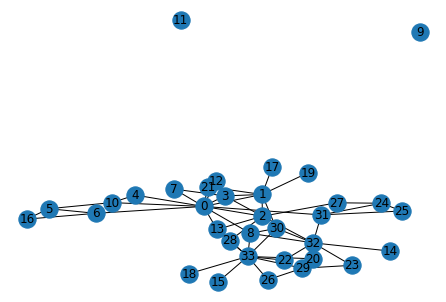

In [11]:
# train on 80% edges, test on 20% removed edges (see if can predict existence of links)

# Remove 20% of the edges
proportion_edges = 0.3
# this is our test set
edge_subset = random.sample(G.edges(), int(proportion_edges * G.number_of_edges()))

# Create a copy of the graph and remove the edges
G_train = G.copy()
G_train.remove_edges_from(edge_subset)

print(edge_subset)
nx.draw(G_train, with_labels=True)


In [12]:
# Make prediction using Jaccard Coefficient
pred_jaccard = list(nx.jaccard_coefficient(G_train))

# return (score AND if edge exist in test edges aka removed subset)
score_jaccard, label_jaccard = zip(*[(s > 0.5, (u,v) in edge_subset) for (u,v,s) in pred_jaccard])

report = metrics.classification_report(score_jaccard, label_jaccard)

print(report)

precision    recall  f1-score   support

       False       0.99      0.95      0.97       501
        True       0.00      0.00      0.00         5

    accuracy                           0.94       506
   macro avg       0.49      0.48      0.49       506
weighted avg       0.98      0.94      0.96       506



In [13]:
# Make prediction using Adamic-Adar Coefficient
pred_aa = list(nx.adamic_adar_index(G_train))

# return (score AND if edge exist in test edges aka removed subset)
score_aa, label_aa = zip(*[(s > 0.5, (u,v) in edge_subset) for (u,v,s) in pred_aa])

print(metrics.classification_report(score_aa, label_aa))

precision    recall  f1-score   support

       False       0.87      0.97      0.92       434
        True       0.43      0.14      0.21        72

    accuracy                           0.85       506
   macro avg       0.65      0.55      0.56       506
weighted avg       0.81      0.85      0.82       506



In [14]:
# Make prediction using Preferential Treatment
pred_pt = list(nx.preferential_attachment(G_train))

# return (score AND if edge exist in test edges aka removed subset)
score_pt, label_pt = zip(*[(s > 20, (u,v) in edge_subset) for (u,v,s) in pred_pt])

print(metrics.classification_report(score_pt, label_pt))

precision    recall  f1-score   support

       False       0.92      0.96      0.94       460
        True       0.22      0.11      0.14        46

    accuracy                           0.88       506
   macro avg       0.57      0.53      0.54       506
weighted avg       0.85      0.88      0.87       506



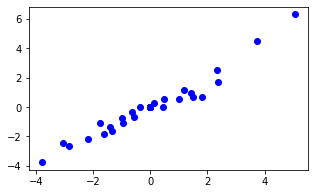

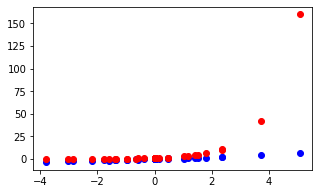

precision    recall  f1-score   support

       False       0.23      0.99      0.37       248
        True       0.96      0.08      0.15       908

    accuracy                           0.28      1156
   macro avg       0.59      0.54      0.26      1156
weighted avg       0.80      0.28      0.20      1156



In [18]:
# link prediction using spectral transformation

# adjacency matrix
A_train = nx.adjacency_matrix(G_train)
A_train = A_train.toarray()

# eigenvalue decomposition
V_train, U_train = np.linalg.eig(A_train)

# U.T * Atest * U
target_V = U_train.T @ A @ U_train
# take only the diagonals
target_V = np.diag(target_V)

# visualise mapping
plt.figure(figsize=(5, 3))
plt.scatter(V_train, target_V, c='b')
plt.show()

# TODO: perform regression using various kernels. Decide the kernel + minimum parameters
alpha = 1
# assume our function is exponential V_train with alpha = 0.6
plt.figure(figsize=(5, 3))
plt.scatter(V_train, target_V, c='b')
plt.scatter(V_train, np.exp(V_train*alpha), c='r')
# plt.scatter(V_train, np.array([1/(1-0.4*v) for v in V_train]), c='r')
# plt.scatter(V_train, V_train**2, c='r')
plt.show()

# # perform Function on A_train
A_test_pred = sc.linalg.expm(A_train * alpha)
# # A_test_pred

# TODO: need to evaluate using mean average precision
# now simply check for each edge in subset, what's the predicted value
pred_spectrum = [(i, j, A_test_pred[i, j]) for i in range(A_test_pred.shape[0]) for j in range(A_test_pred.shape[1])]

# return (score AND if edge exist in test edges aka removed subset)
# TODO: how to determine the right threshold value?
score_spectrum, label_spectrum = zip(*[(s > 0.5, (u,v) in list(G.edges())) for (u,v,s) in pred_spectrum])

print(metrics.classification_report(score_spectrum, label_spectrum))

# Compare all Link Prediction

In [27]:
def spectralTransformation(alpha=0.2):
    # adjacency matrix
    A_train = nx.adjacency_matrix(G_train)
    A_train = A_train.toarray()

    # eigenvalue decomposition
    V_train, U_train = np.linalg.eig(A_train)

    # U.T * Atest * U
    target_V = U_train.T @ A @ U_train
    # take only the diagonals
    target_V = np.diag(target_V)

    # # visualise mapping
    # plt.figure(figsize=(5, 3))
    # plt.scatter(V_train, target_V, c='b')
    # plt.show()

    # # TODO: perform regression using various kernels. Decide the kernel + minimum parameters
    # # assume our function is exponential V_train with alpha = 0.6
    # plt.figure(figsize=(5, 3))
    # plt.scatter(V_train, target_V, c='b')
    # plt.scatter(V_train, np.exp(V_train*alpha), c='r')
    # # plt.scatter(V_train, np.array([1/(1-0.4*v) for v in V_train]), c='r')
    # # plt.scatter(V_train, V_train**2, c='r')
    # plt.show()

    # # perform Function on A_train
    A_test_pred = sc.linalg.expm(A_train * alpha)
    # # A_test_pred

    # TODO: need to evaluate using mean average precision
    # only check for edges that are not in the training list
    # pred_spectrum = [(i, j, A_test_pred[i, j]) for i in range(A_test_pred.shape[0]) for j in range(A_test_pred.shape[1]) if (i, j) not in G_train.edges()]
    pred_spectrum = [(i, j, A_test_pred[i, j]) for i in range(A_test_pred.shape[0]) for j in range(A_test_pred.shape[1])]

    return pred_spectrum

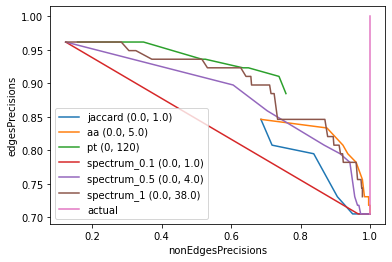

In [28]:

def draw_precision_recall(name, pred):

    threshold = 0.5

    nonEdgesPrecisions = []
    edgesPrecisions = []

    for threshold in np.arange(0, 10, 0.1):


        # pred_jaccard = list(nx.jaccard_coefficient(G_train))
        # get all predicted edges
        predEdges = list(filter(lambda x: x[2] > threshold, pred))
        predEdges = [(edge[0], edge[1]) for edge in predEdges]

        # create temp graph to store new edges
        Gpred = nx.Graph()
        Gpred.add_nodes_from(G.nodes())
        Gpred.add_edges_from(G_train.edges())
        Gpred.add_edges_from(predEdges)

        # compare Gpred (Apred) and G (A)
        Apred = nx.adjacency_matrix(Gpred)
        Apred = Apred.toarray()

        report = metrics.classification_report(Apred.flatten(), A.flatten(), output_dict=True)
        nonEdgesPrecision = report['0']['precision']
        edgesPrecision = report['1']['precision']
        nonEdgesPrecisions.append(nonEdgesPrecision)
        edgesPrecisions.append(edgesPrecision)


    plt.plot(nonEdgesPrecisions, edgesPrecisions, label=name)


def getMinMax(pred):
    pred = [p[2] for p in pred]
    return (np.round(np.min(pred)), np.round(np.max(pred)))


pred_jaccard = list(nx.jaccard_coefficient(G_train))
draw_precision_recall("jaccard ({}, {})".format(*getMinMax(pred_jaccard)), pred_jaccard)

pred_aa = list(nx.adamic_adar_index(G_train))
draw_precision_recall("aa ({}, {})".format(*getMinMax(pred_aa)), pred_aa)

pred_pt = list(nx.preferential_attachment(G_train))
draw_precision_recall("pt ({}, {})".format(*getMinMax(pred_pt)), pred_pt)

# try a few spectrum
alpha=0.1
pred_spectrum = spectralTransformation(alpha)
draw_precision_recall("spectrum_{} ({}, {})".format(alpha, *getMinMax(pred_spectrum)), pred_spectrum)

alpha=0.5
pred_spectrum = spectralTransformation(alpha)
draw_precision_recall("spectrum_{} ({}, {})".format(alpha, *getMinMax(pred_spectrum)), pred_spectrum)

alpha=1
pred_spectrum = spectralTransformation(alpha)
draw_precision_recall("spectrum_{} ({}, {})".format(alpha, *getMinMax(pred_spectrum)), pred_spectrum)

# groundtruth
actual = [(i, j, A[i, j]) for i in range(A.shape[0]) for j in range(A.shape[1])]
draw_precision_recall("actual", actual)

plt.xlabel("nonEdgesPrecisions")
plt.ylabel("edgesPrecisions")
plt.legend()
plt.show()
